In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importing File
cupid= pd.read_csv('okcupid_profiles.csv')

In [3]:
#Replacing Sex Values from f and m to Female and Male 
cupid.sex.replace(['f','m'],['Female','Male'], inplace= True)

In [4]:
#REPLACING NA VALUES
columns=["body_type",
      "diet", "education","drinks",
      "drugs","ethnicity",
      "job","offspring","pets","religion",
      "sign", "smokes", "speaks"
     ]
cupid[columns]=cupid[columns].fillna("No info")

In [5]:
#REPLACING NUMERICAL NA VALUES WITH 0 
cupid["height"]=cupid["height"].fillna(0)
cupid["income"]=cupid["income"].replace(-1, 0)

In [6]:
#Renaming Columns
cupid.rename(columns={
'essay0': 'summary', 
'essay1': 'doing_with_life', 
'essay2': 'good_at',
'essay3': 'first_notice_me',
'essay4': 'favorites',
'essay5': 'six_things_needed',
'essay6': 'thinking_about',
'essay7': 'friday_night',
'essay8': 'admit_private',
'essay9': 'message_if',
}, inplace=True)


In [7]:
## SETTING SEABORN THEMES 
sns.set_style('dark')
sns.set_palette("hls", 8)

In [8]:
#CREATING A CITY AND STATE COLUMN BASED OF LOCATION COLUMN
def save_city(loc): 
    return loc.split(',')[0]
cupid['city'] = cupid['location'].apply(save_city)
def save_state(loc): 
    return loc.split(',')[1]
cupid['state']= cupid['location'].apply(save_state)

In [9]:
#REMOVING THE TIME FROM LAST ONLINE DATE COLUMN
def remove_time(dte): 
    return dte[0:10]

cupid['last_online']= cupid['last_online'].apply(remove_time)

In [10]:
#CONVERTING LAST ONLINE TO DATE COLUMN
cupid['last_online'] = pd.to_datetime(cupid['last_online'])

In [11]:
#CREATING A COLUMN FOR THE LAST MONTH USERS WERE ONLINE
cupid['last_online_month']= cupid.last_online.dt.month

In [12]:
#CREATING A COLUMN FOR THE LAST DAY OF THE MONTH USERS WERE ONLINE
cupid['last_online_day']= cupid.last_online.dt.day 

In [13]:
#CONFIRMING CHANGES 
cupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                59946 non-null  int64         
 1   status             59946 non-null  object        
 2   sex                59946 non-null  object        
 3   orientation        59946 non-null  object        
 4   body_type          59946 non-null  object        
 5   diet               59946 non-null  object        
 6   drinks             59946 non-null  object        
 7   drugs              59946 non-null  object        
 8   education          59946 non-null  object        
 9   ethnicity          59946 non-null  object        
 10  height             59946 non-null  float64       
 11  income             59946 non-null  int64         
 12  job                59946 non-null  object        
 13  last_online        59946 non-null  datetime64[ns]
 14  locati

                                          # VISUALIZATION OF DATASET

# AGE

([<matplotlib.axis.XTick at 0x7f7fdbdd7190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

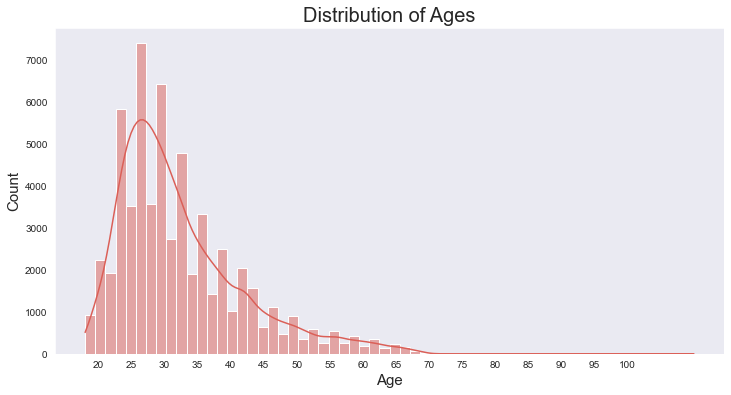

In [14]:
#AGE DISTRIBUTION
plt.figure(figsize=(12,6))
sns.histplot(
data=cupid, 
x='age',
bins=60,
kde= True, 
)

plt.title('Distribution of Ages', fontsize= 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize= 15)
plt.xticks([20,25,30,35,40,45,50,55,60,65,70,75,80,85, 90, 95,100])

([<matplotlib.axis.XTick at 0x7f7fced49ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

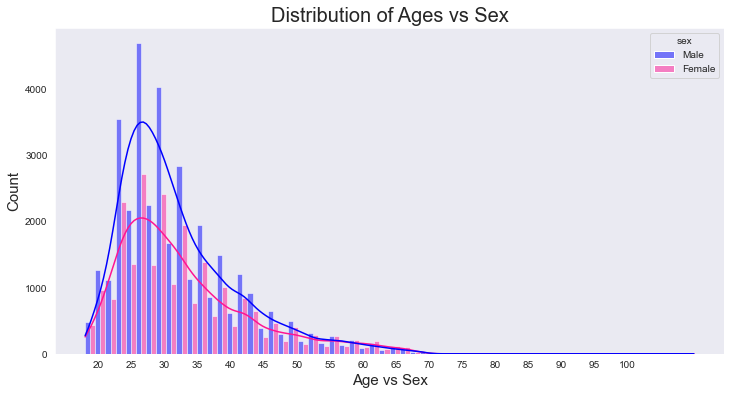

In [15]:
#AGE DISTRIBUTION
plt.figure(figsize=(12,6))
sns.histplot(
data=cupid, 
x='age',
bins=60,
hue='sex',
multiple='dodge', 
kde= True, 
palette=['blue','deeppink']
)


plt.title('Distribution of Ages vs Sex', fontsize= 20)
plt.xlabel('Age vs Sex', fontsize=15)
plt.ylabel('Count', fontsize= 15)
plt.xticks([20,25,30,35,40,45,50,55,60,65,70,75,80,85, 90, 95,100])

(18.0, 65.0)

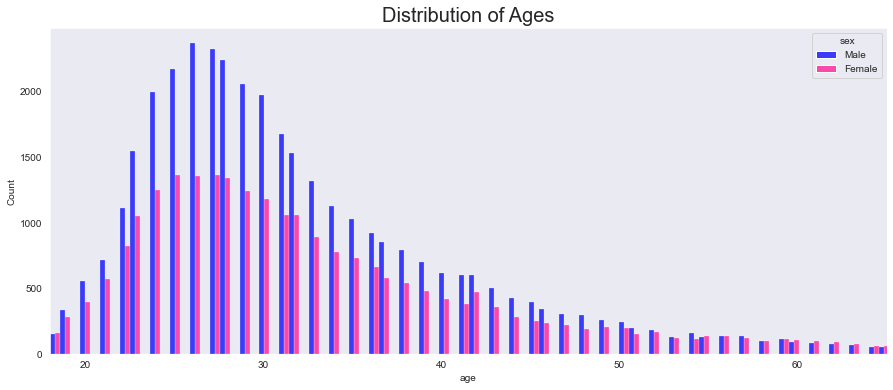

In [16]:
#CLOSER LOOK AT DISTRIBUTION OF AGES 
plt.figure(figsize=(15,6))
sns.histplot( 
data=cupid, 
x='age',
hue='sex',
multiple='dodge',
palette=['blue','deeppink'])
plt.title('Distribution of Ages',fontsize=20)
plt.xlim(18,65)

Text(0, 0.5, 'Age')

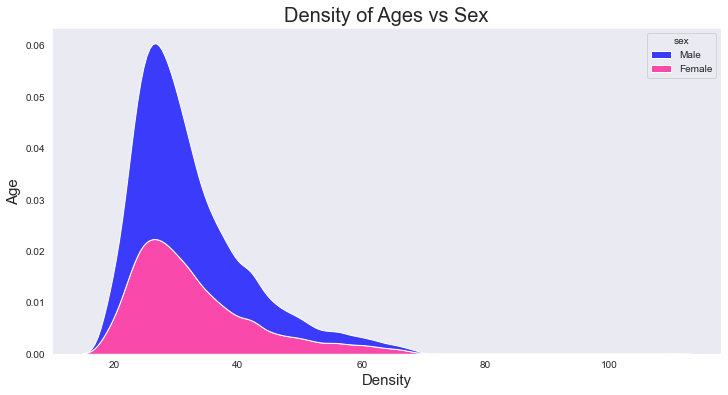

In [17]:
plt.figure(figsize=(12,6))
sns.kdeplot( 
data=cupid, 
x='age', 
hue='sex',
palette=['blue','deeppink'],
multiple="stack")
plt.title('Density of Ages vs Sex',fontsize=20)
plt.xlabel('Density',fontsize=15)
plt.ylabel('Age', fontsize=15)

Text(0, 0.5, 'Age')

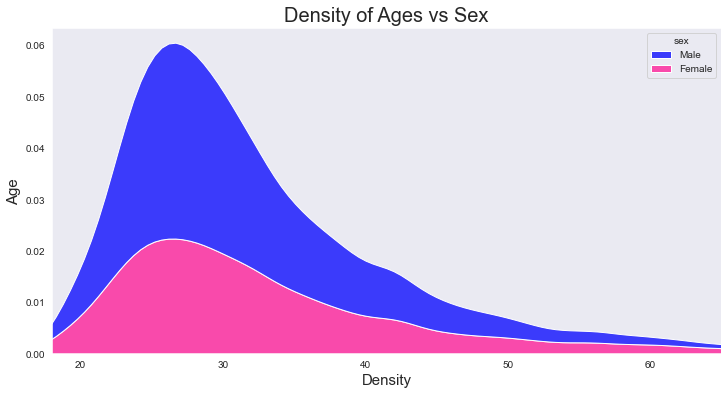

In [18]:
#CLOSER LOOK AT KERNEL DENSITY MODEL OF AGES VS SEX 
plt.figure(figsize=(12,6))
sns.kdeplot( 
data=cupid, 
x='age', 
hue='sex',
palette=['blue','deeppink'],
multiple="stack")
plt.xlim(18,65)
plt.title('Density of Ages vs Sex',fontsize=20)
plt.xlabel('Density',fontsize=15)
plt.ylabel('Age', fontsize=15)



# RELATIONSHIP STATUS

Text(0, 0.5, 'Count')

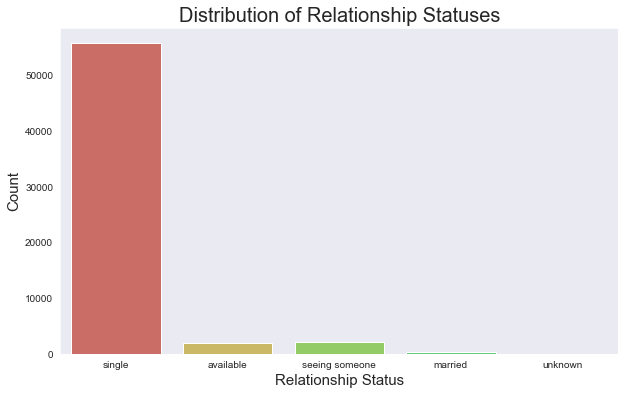

In [19]:
#RELATIONSHIP STATUS DISTRIBUTION 
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
x='status') 
plt.title('Distribution of Relationship Statuses',fontsize=20)
plt.xlabel('Relationship Status', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0.5, 0, 'Count')

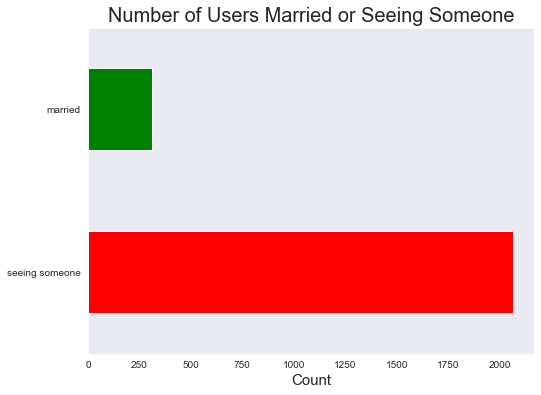

In [20]:
#VISUALIZATION OF PARTICIPANTS CONSIDERED "NOT SINGLE"
plt.figure(figsize=(8,6))
values = cupid.status.value_counts()
values[['seeing someone','married',]].plot(kind='barh', color=['red','green'])
plt.title('Number of Users Married or Seeing Someone', fontsize=20)
plt.xlabel('Count', fontsize=15)

# SEX

Text(0, 0.5, 'Sex')

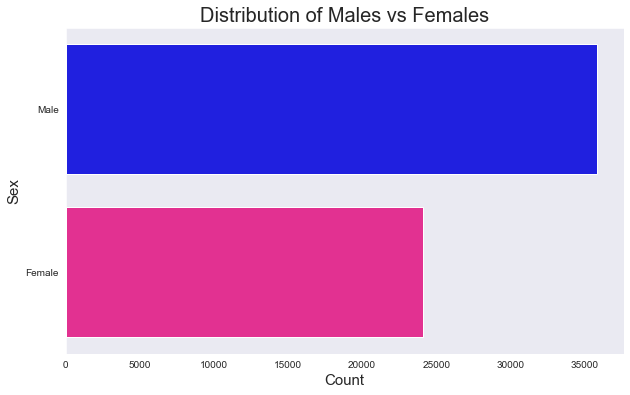

In [21]:
#Distribution of Sex 
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
y='sex',
palette=['blue','deeppink'])
plt.title('Distribution of Males vs Females',fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Sex', fontsize=15)

Text(0.5, 1.0, 'Males vs Females')

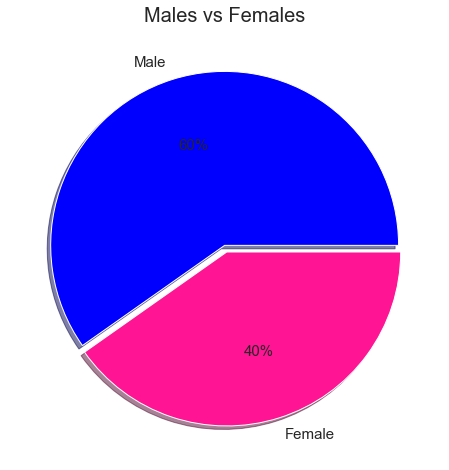

In [22]:
#DISTRIBUTION OF MALES VS FEMALES 
plt.figure(figsize=(8,8))
cupid.sex.value_counts().plot(kind='pie',autopct='%1.f%%', explode=(0,.04),label="", shadow=True,colors=['blue','deeppink'],fontsize=15)
plt.title('Males vs Females', fontsize=20)

# SEXUAL ORIENTATION

Text(0, 0.5, 'Count')

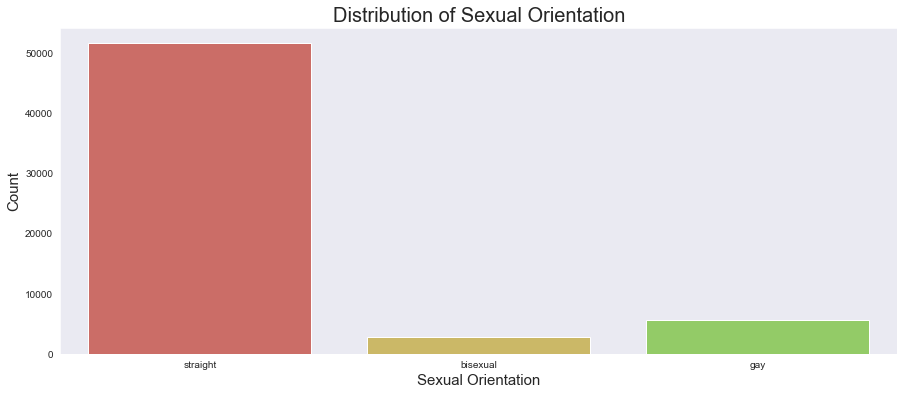

In [23]:
#Distribution of orientation
plt.figure(figsize=(15,6))
sns.countplot( 
data=cupid, 
x='orientation')
plt.title('Distribution of Sexual Orientation', fontsize=20)
plt.xlabel('Sexual Orientation', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0.5, 1.0, 'Percentage of Sexual Orientations')

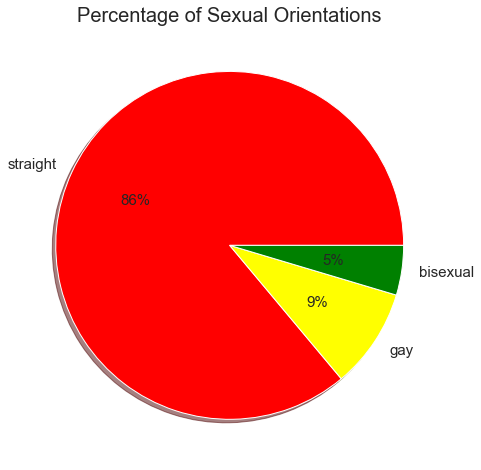

In [24]:
#Distributions of Orientations in Pie Chart Showing Percentages
plt.figure(figsize=(8,8))
cupid.orientation.value_counts().plot(kind='pie',autopct='%1.f%%',label="", shadow=True,colors=['red','yellow','green'],fontsize=15)
plt.title('Percentage of Sexual Orientations',fontsize=20)

In [25]:
##ORIENTATION VS SEX

# BODY TYPE

Text(0.5, 1.0, 'Distribution of Body Types')

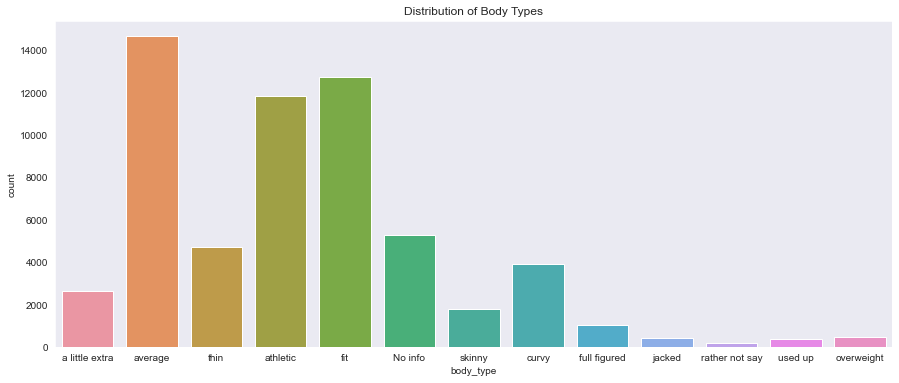

In [26]:
#Distribution of Body Types 
plt.figure(figsize=(15,6))
sns.countplot( 
data=cupid, 
x='body_type')
plt.title('Distribution of Body Types')

Text(0, 0.5, 'Count')

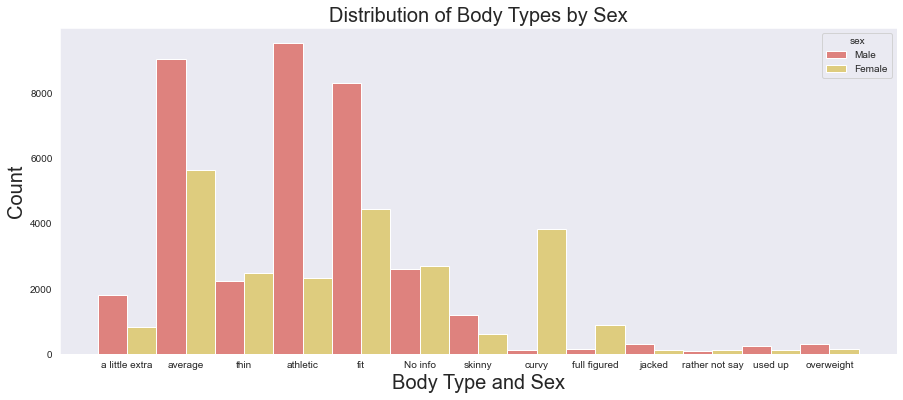

In [27]:
#Distribution of Body Type by Sex
plt.figure(figsize=(15,6))
sns.histplot( 
data=cupid, 
x='body_type',
hue='sex',
multiple='dodge')
plt.title('Distribution of Body Types by Sex',fontsize=20)
plt.xlabel('Body Type and Sex',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Count')

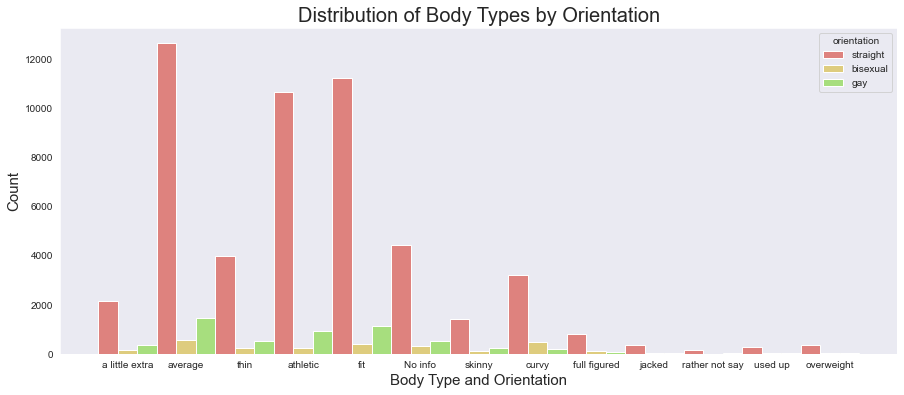

In [28]:
#Distribution of Body Type by Orientation 

plt.figure(figsize=(15,6))
sns.histplot( 
data=cupid, 
x='body_type',
hue='orientation',
multiple='dodge')
plt.title('Distribution of Body Types by Orientation',fontsize=20)
plt.xlabel('Body Type and Orientation',fontsize=15)
plt.ylabel('Count',fontsize=15)

# DIET TYPE

Text(0.5, 0, 'Count')

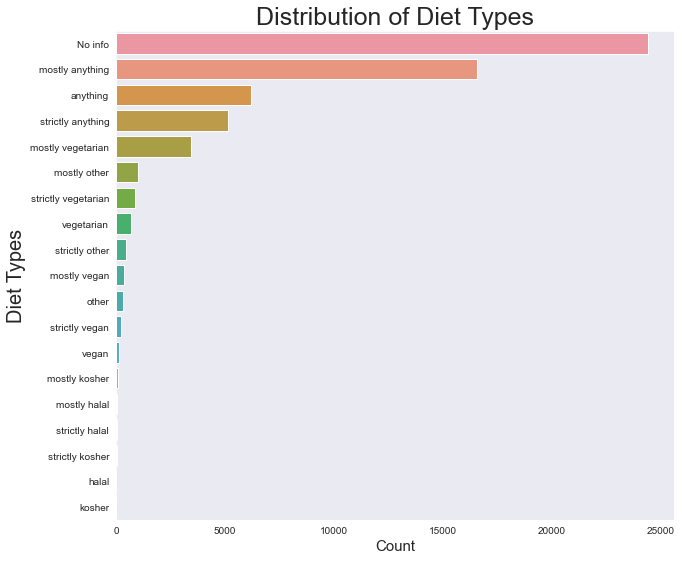

In [29]:
#Distribution of diet

plt.figure(figsize=(10,9))
sns.countplot( 
data=cupid, 
order= cupid.diet.value_counts().sort_values(ascending=False).index,
y='diet')
plt.title('Distribution of Diet Types', fontsize=25)
plt.ylabel('Diet Types',fontsize=20)
plt.xlabel('Count',fontsize=15)

Text(0.5, 0, 'Count')

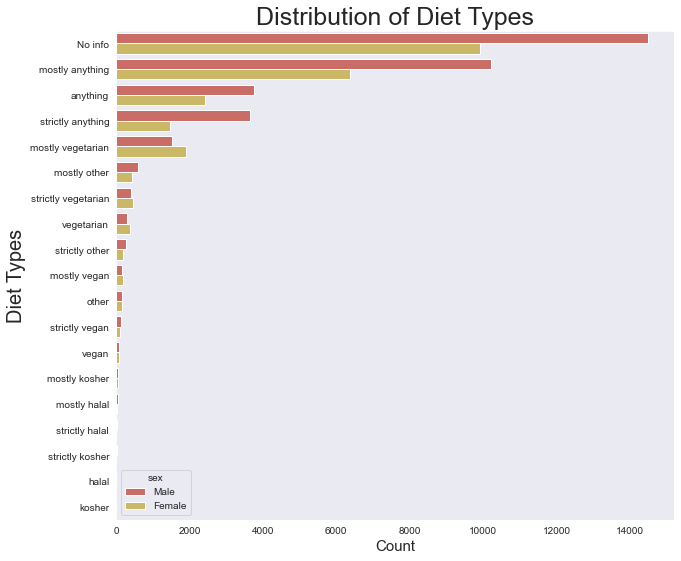

In [30]:
#Distribution of diet

plt.figure(figsize=(10,9))
sns.countplot( 
data=cupid, 
y='diet', 
hue='sex', 
order= cupid.diet.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Diet Types', fontsize=25)
plt.ylabel('Diet Types',fontsize=20)
plt.xlabel('Count',fontsize=15)

# ALCOHOL CONSUMPTION

Text(0, 0.5, 'Count')

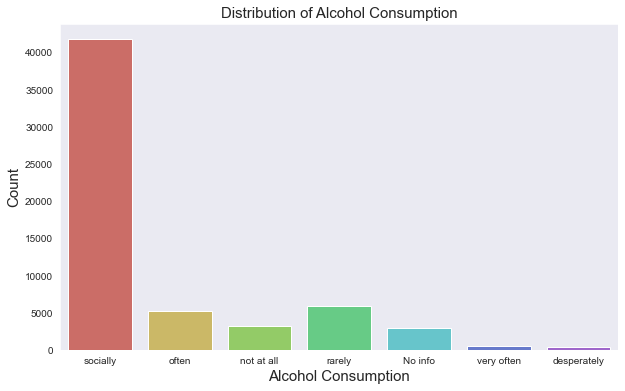

In [31]:
#Distribution of Alcohol Consumption
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
x='drinks')
plt.xlabel('Alcohol Consumption', fontsize=15)
plt.title('Distribution of Alcohol Consumption',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

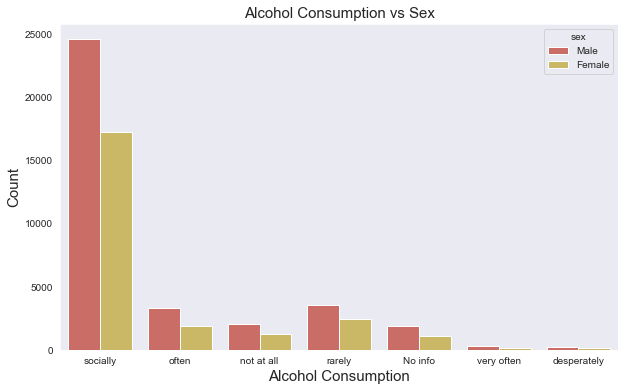

In [32]:
#Distribution of Alcohol Consumption
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
x='drinks', 
hue='sex')
plt.xlabel('Alcohol Consumption', fontsize=15)
plt.title('Alcohol Consumption vs Sex',fontsize=15)
plt.ylabel('Count',fontsize=15)

# DRUG USAGE

Text(0, 0.5, 'Count')

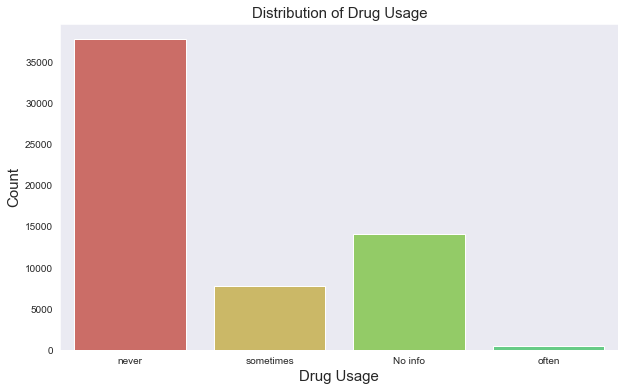

In [33]:
#Distribution of Drug Usage 
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
x='drugs')
plt.xlabel('Drug Usage', fontsize=15)
plt.title('Distribution of Drug Usage',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

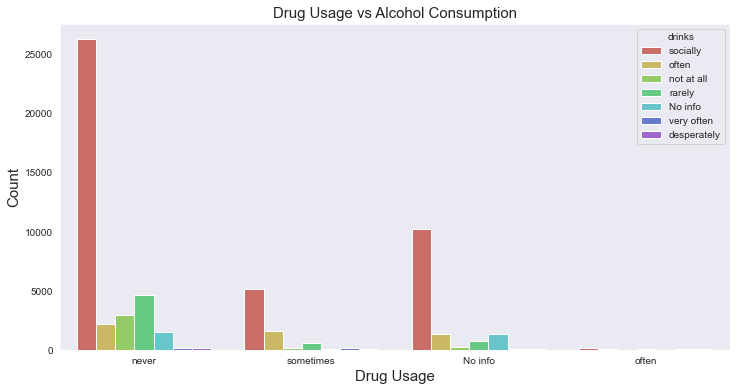

In [34]:
plt.figure(figsize=(12,6))
sns.countplot( 
data=cupid, 
x='drugs', 
hue='drinks')
plt.xlabel('Drug Usage', fontsize=15)
plt.title('Drug Usage vs Alcohol Consumption',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

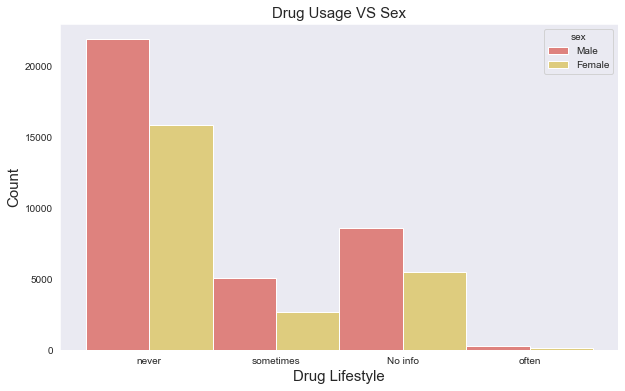

In [35]:
#DRUG USE VS SEX 
plt.figure(figsize=(10,6))
sns.histplot( 
data=cupid, 
x='drugs',
hue='sex',
multiple='dodge')
plt.xlabel('Drug Lifestyle', fontsize=15)
plt.title('Drug Usage VS Sex',fontsize=15)
plt.ylabel('Count',fontsize=15)

# EDUCATION

Text(0.5, 0, 'Count')

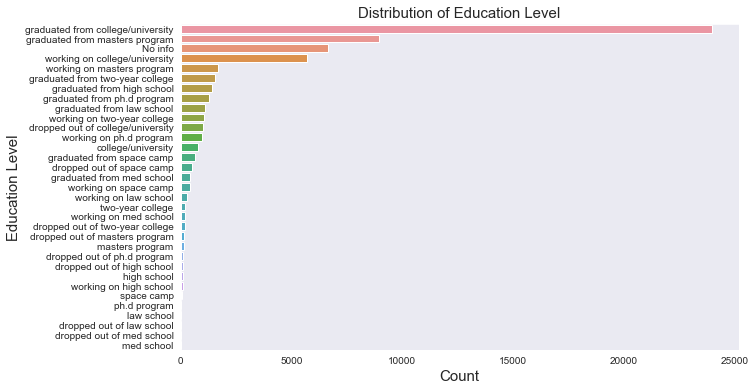

In [36]:
#Distribution of Education
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
y='education',
order= cupid.education.value_counts().sort_values(ascending=False).index)
plt.ylabel('Education Level', fontsize=15)
plt.title('Distribution of Education Level',fontsize=15)
plt.xlabel('Count',fontsize=15)

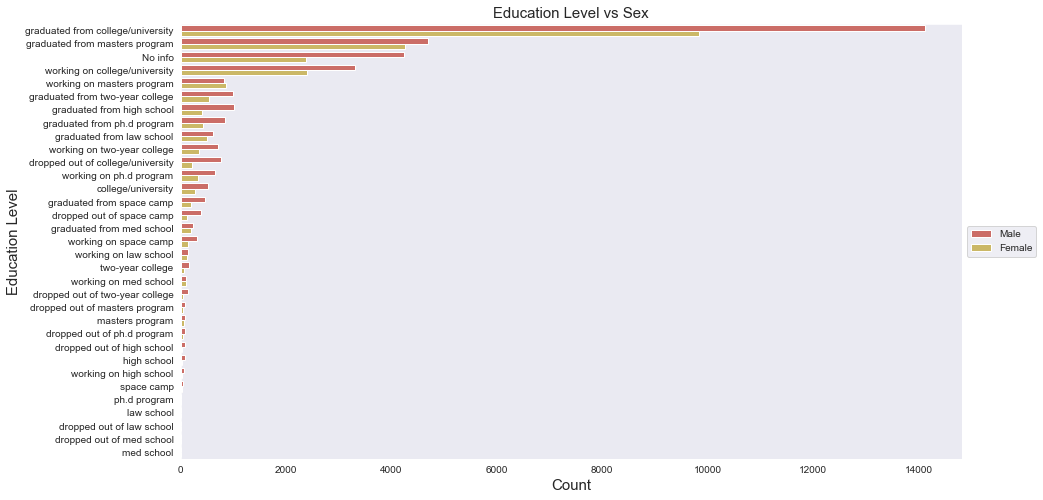

In [37]:
#Distribution of Education
plt.figure(figsize=(14,8))
sns.countplot( 
data=cupid, 
y='education', 
hue='sex',
order= cupid.education.value_counts().sort_values(ascending=False).index)
plt.ylabel('Education Level', fontsize=15)
plt.title('Education Level vs Sex',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# HEIGHT

Text(0.5, 0, 'Height')

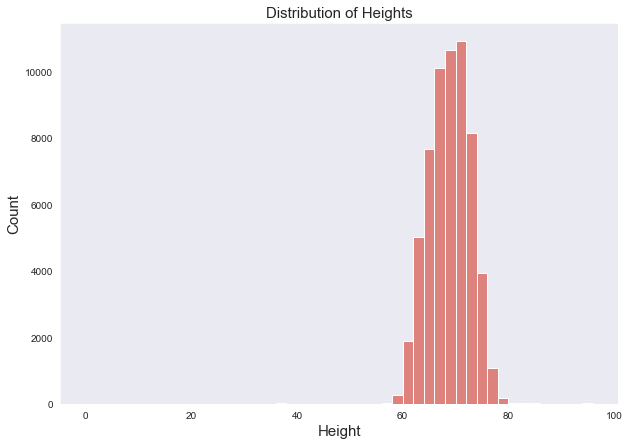

In [38]:
#Distribution of height
plt.figure(figsize=(10,7))
sns.histplot( 
data=cupid, 
x='height', 
binwidth=2)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Heights',fontsize=15)
plt.xlabel('Height',fontsize=15)

(55.0, 80.0)

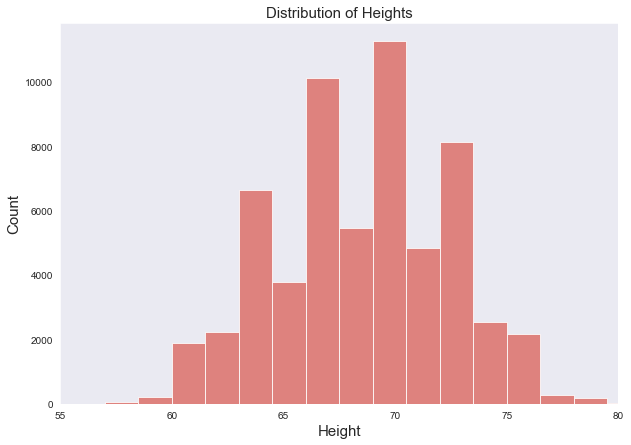

In [39]:
#Distribution of Heights Zoomed In 
plt.figure(figsize=(10,7))
sns.histplot( 
data=cupid, 
x='height',
binwidth= 1.5)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Heights',fontsize=15)
plt.xlabel('Height',fontsize=15)
plt.xlim(55,80)

Text(0.5, 0, 'Height')

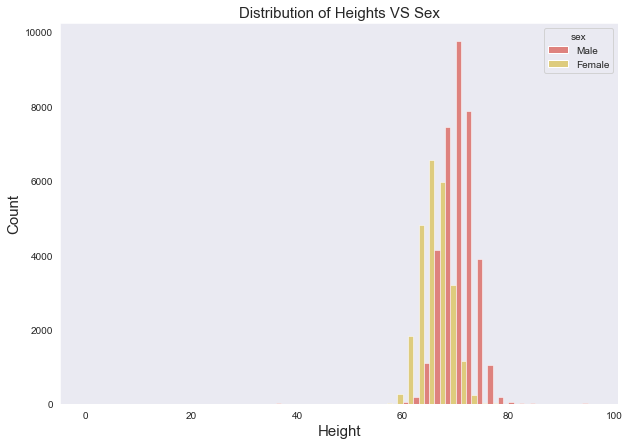

In [40]:
#Distribution of height vs sex 
plt.figure(figsize=(10,7))
sns.histplot( 
data=cupid, 
x='height', 
hue='sex',
binwidth= 2, 
multiple='dodge')
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Heights VS Sex',fontsize=15)
plt.xlabel('Height',fontsize=15)

(50.0, 80.0)

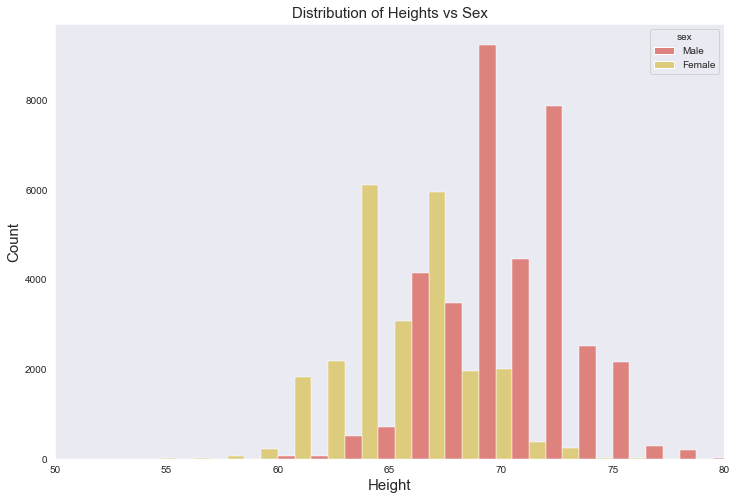

In [41]:
#Distribution of Heights Zoomed In 
plt.figure(figsize=(12,8))
sns.histplot( 
data=cupid, 
x='height', 
hue='sex', 
multiple='dodge',
binwidth= 1.5)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Heights vs Sex',fontsize=15)
plt.xlabel('Height',fontsize=15)
plt.xlim(50,80)

# INCOME

Text(0, 0.5, 'Count')

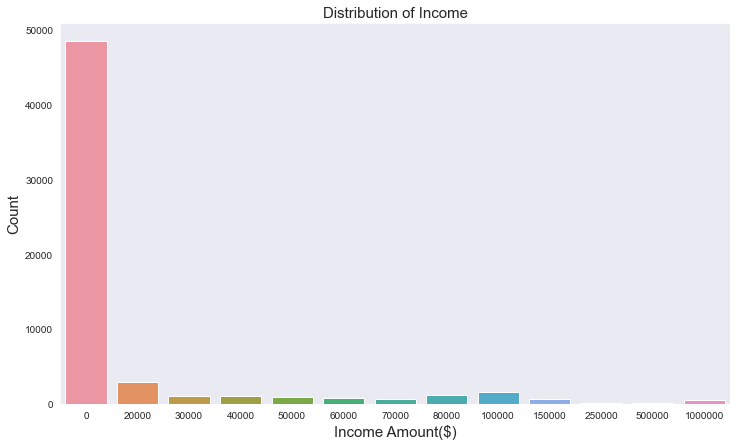

In [42]:
#Distribution of income
plt.figure(figsize=(12,7))
sns.countplot( 
data=cupid, 
x='income')
plt.title('Distribution of Income', fontsize=15)
plt.xlabel('Income Amount($)',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [43]:
#AVERAGE INCOME: 
cupid.income.mean()

20034.030627564807

# OCCUPATIONS

Text(0.5, 0, 'Count')

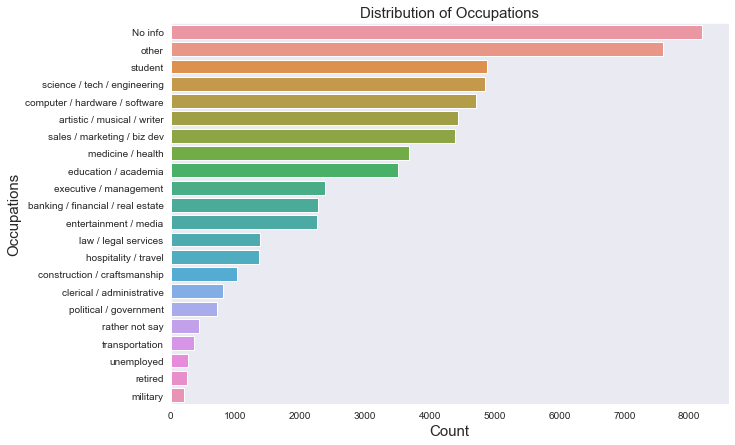

In [44]:
#Distribution of Jobs
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
y='job',
order= cupid.job.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Occupations', fontsize=15)
plt.ylabel('Occupations',fontsize=15)
plt.xlabel('Count',fontsize=15)

Text(0.5, 0, 'Count')

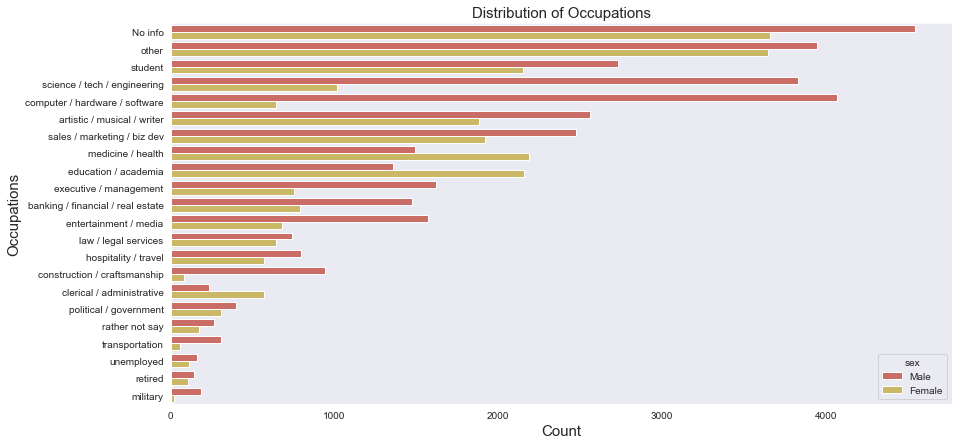

In [45]:
#Distribution of Jobs
plt.figure(figsize=(14,7))
sns.countplot( 
data=cupid, 
y='job',
hue='sex', 
order= cupid.job.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Occupations', fontsize=15)
plt.ylabel('Occupations',fontsize=15)
plt.xlabel('Count',fontsize=15)

# OFFSPRING

Text(0.5, 1.0, 'Distribution of Participants with Offspring')

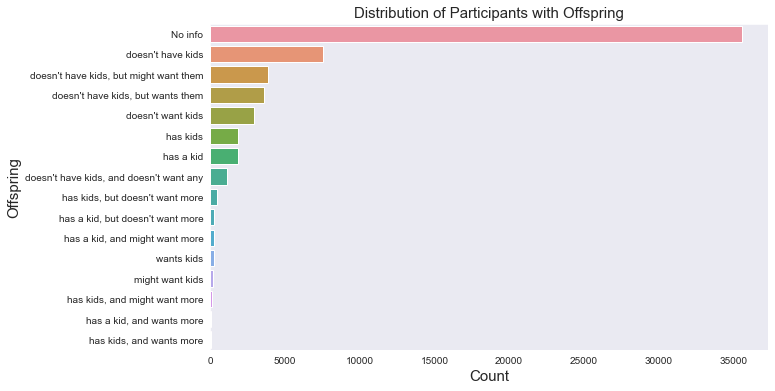

In [46]:
#Distribution of Offspring
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
y='offspring',
order= cupid.offspring.value_counts().sort_values(ascending=False).index)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Offspring', fontsize=15)
plt.title('Distribution of Participants with Offspring',fontsize=15)


Text(0.5, 1.0, 'Distribution of Participants with Offspring')

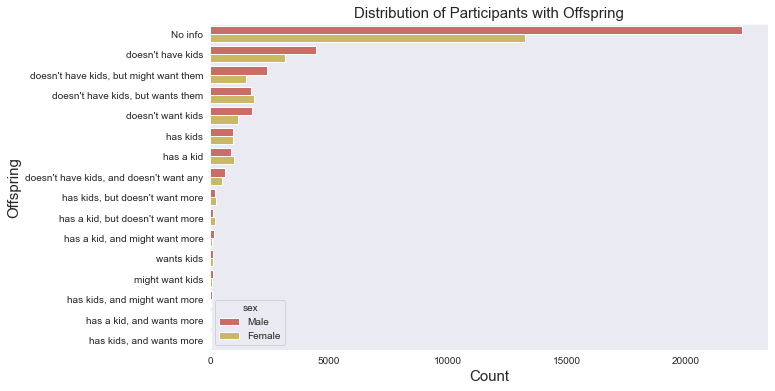

In [47]:
#Distribution of Offspring
plt.figure(figsize=(10,6))
sns.countplot( 
data=cupid, 
y='offspring',
hue='sex',
order= cupid.offspring.value_counts().sort_values(ascending=False).index)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Offspring', fontsize=15)
plt.title('Distribution of Participants with Offspring',fontsize=15)

# PETS

Text(0.5, 0, 'Count')

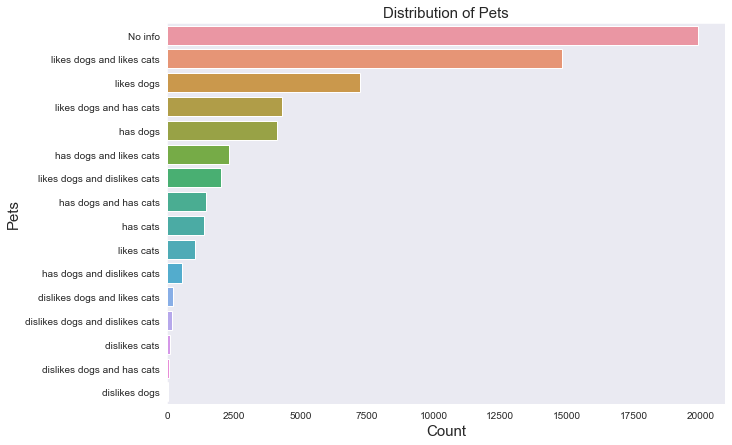

In [48]:
#Distribution of pets
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
y='pets',
order= cupid.pets.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Pets', fontsize=15)
plt.ylabel('Pets',fontsize=15)
plt.xlabel('Count',fontsize=15)

Text(0.5, 0, 'Count')

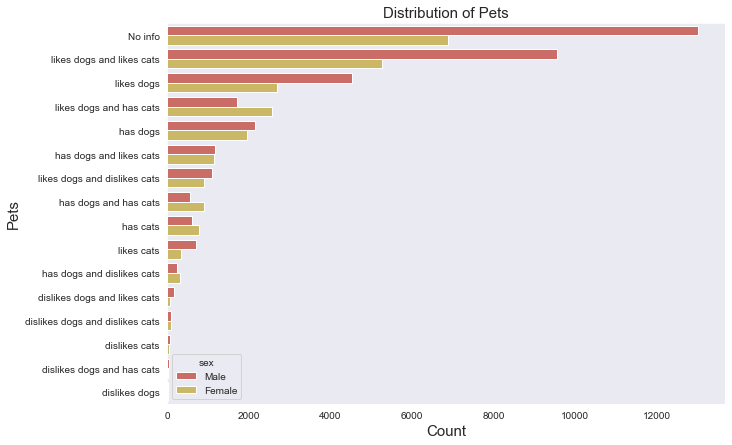

In [49]:
#Distribution of pets
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
y='pets',
hue='sex',
order= cupid.pets.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Pets', fontsize=15)
plt.ylabel('Pets',fontsize=15)
plt.xlabel('Count',fontsize=15)

# RELIGION

Text(0.5, 0, 'Count')

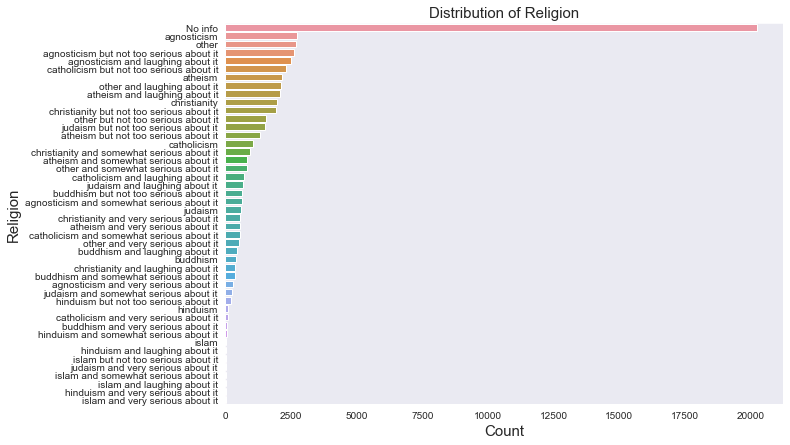

In [50]:
#Distribution of religion
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
y='religion',
order= cupid.religion.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Religion', fontsize=15)
plt.ylabel('Religion',fontsize=15)
plt.xlabel('Count',fontsize=15)

Text(0.5, 0, 'Count')

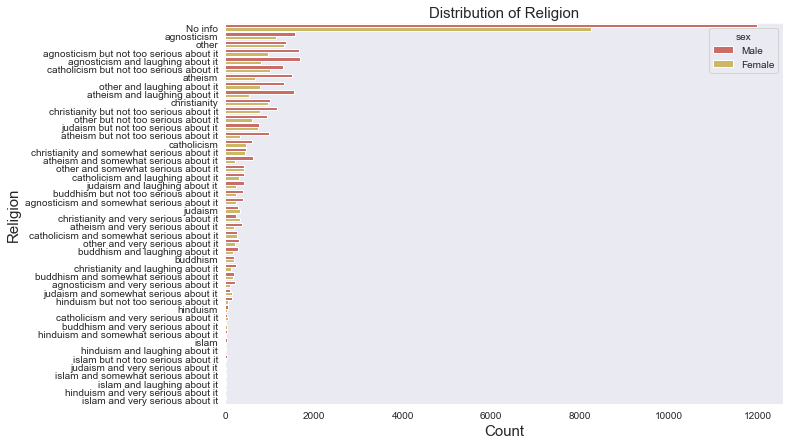

In [51]:
#Distribution of Religion
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
y='religion',
hue='sex',
order= cupid.religion.value_counts().sort_values(ascending=False).index)
plt.title('Distribution of Religion', fontsize=15)
plt.ylabel('Religion',fontsize=15)
plt.xlabel('Count',fontsize=15)

# ZODIAC SIGNS

Text(0.5, 0, 'Count')

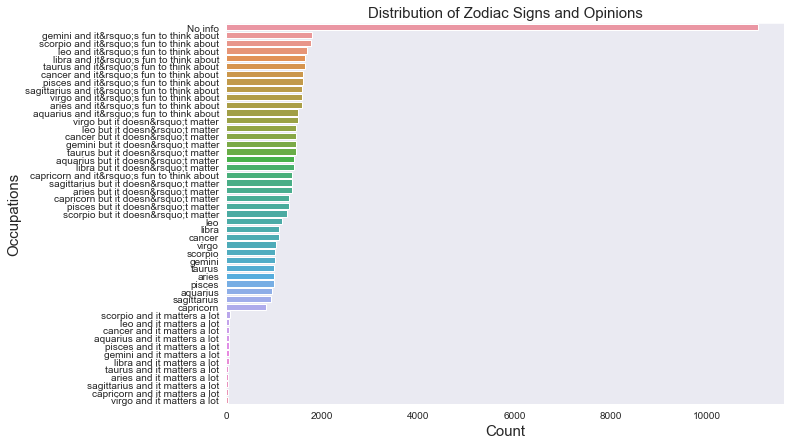

In [52]:
#Distribution of Sign
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
y='sign', 
order= cupid['sign'].value_counts().index
)
plt.title('Distribution of Zodiac Signs and Opinions', fontsize=15)
plt.ylabel('Occupations',fontsize=15)
plt.xlabel('Count',fontsize=15)

# SMOKING 

Text(0, 0.5, 'Count')

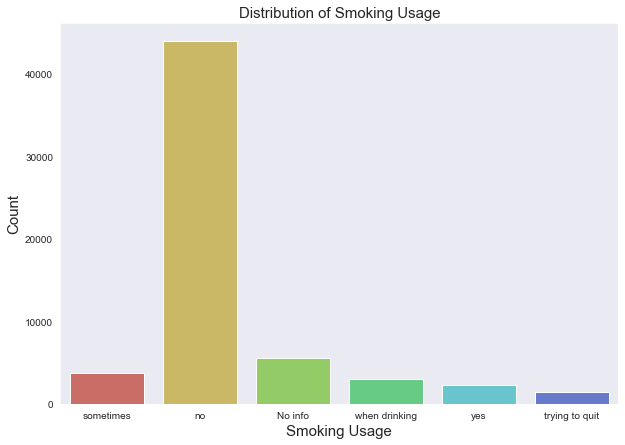

In [53]:
#Distribution of smoking
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
x='smokes')
plt.title('Distribution of Smoking Usage', fontsize=15)
plt.xlabel('Smoking Usage',fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0.5, 0, 'Usage vs Sex')

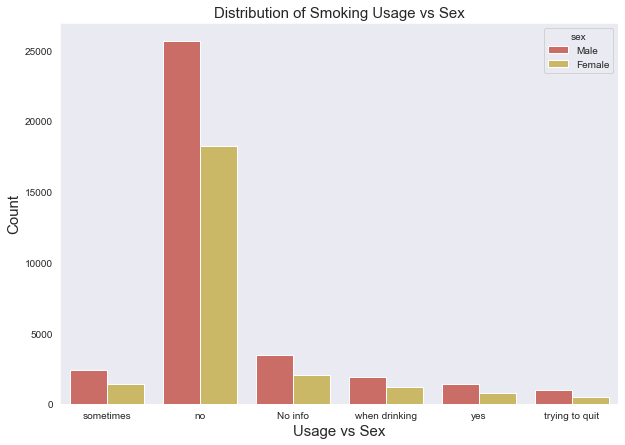

In [54]:
#SMOKING VS SEX 
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
x='smokes', 
hue='sex')
plt.title('Distribution of Smoking Usage vs Sex', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Usage vs Sex',fontsize=15)

Text(0.5, 0, 'Smoking Usage and Orientation')

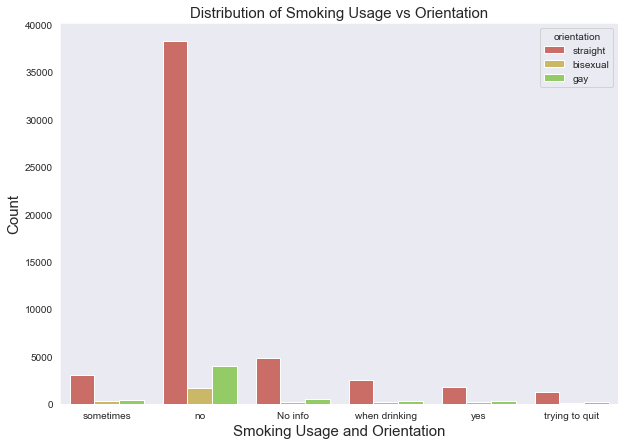

In [55]:
#SMOKING VS ORIENTATION
plt.figure(figsize=(10,7))
sns.countplot( 
data=cupid, 
x='smokes', 
hue='orientation')
plt.title('Distribution of Smoking Usage vs Orientation', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Smoking Usage and Orientation',fontsize=15)

# Languages

Text(0, 0.5, 'Languages')

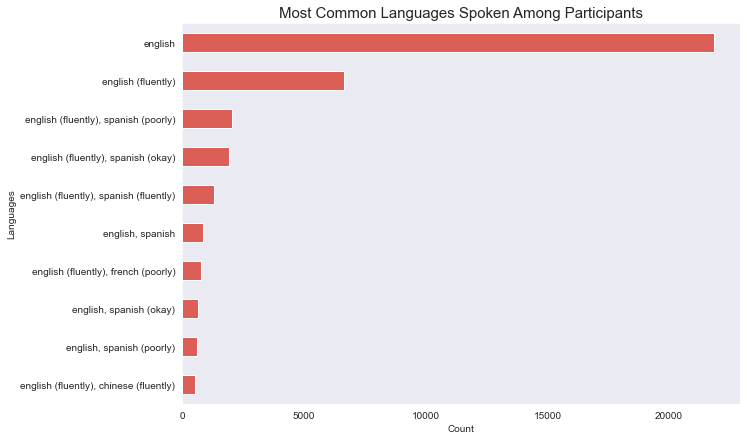

In [56]:
#MOST COMMON LANGUAGES
plt.figure(figsize=(10,7))
cupid.speaks.value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Most Common Languages Spoken Among Participants', fontsize= 15)
plt.xlabel('Count')
plt.ylabel('Languages')

# LOCATION

<AxesSubplot:>

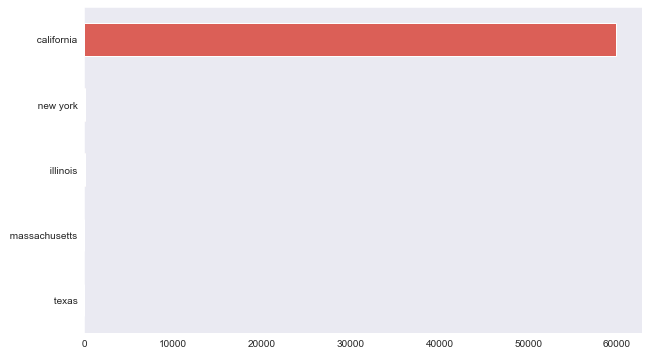

In [57]:
#MOST COMMON STATES
plt.figure(figsize=(10,6))
cupid.state.value_counts().head(5).sort_values().plot(kind='barh')

In [58]:
cupid.state.value_counts().head(5)

 california       59855
 new york            17
 illinois             8
 massachusetts        5
 texas                4
Name: state, dtype: int64

In [59]:
#PERCENTAGE OF PARTICIPANTS FROM CALIFORNIA 
total_states= len(cupid.state)
cal_states= len(cupid[cupid.state == ' california'].state)
percentage_cal = cal_states/total_states
percentage_cal * 100

99.84819671037268

Text(0, 0.5, 'Cities')

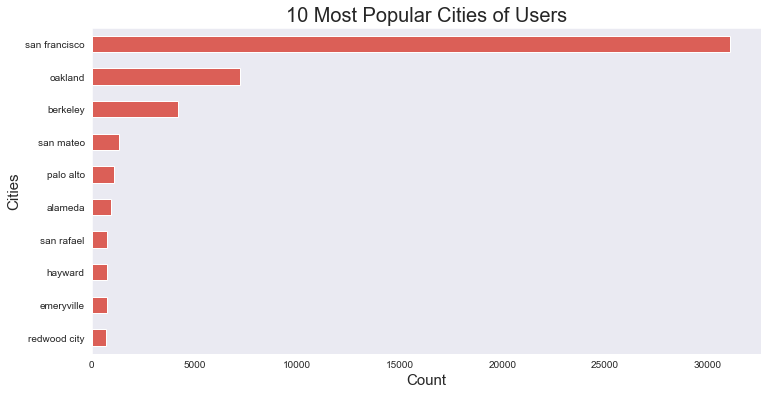

In [60]:
#10 MOST COMMON CITIES
plt.figure(figsize=(12,6))
cupid.city.value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.title('10 Most Popular Cities of Users',fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Cities', fontsize= 15)

# LAST ONLINE

Text(0.5, 1.0, 'Month Users Were Last Online')

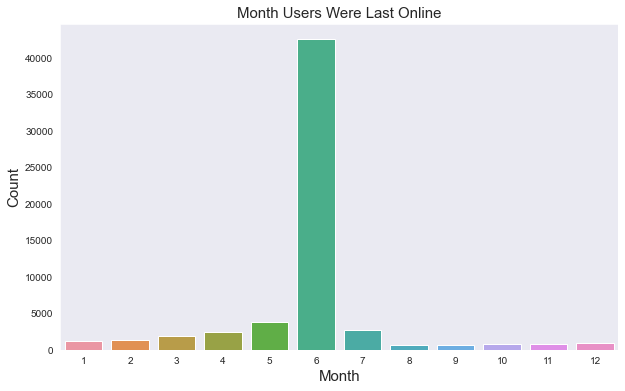

In [61]:
#Distribution of Month Users were last online
plt.figure(figsize=(10,6))
sns.countplot( 
data= cupid,
x='last_online_month'
)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Month Users Were Last Online',fontsize=15)

Text(0.5, 1.0, 'Day of the Month Users Were Last Online')

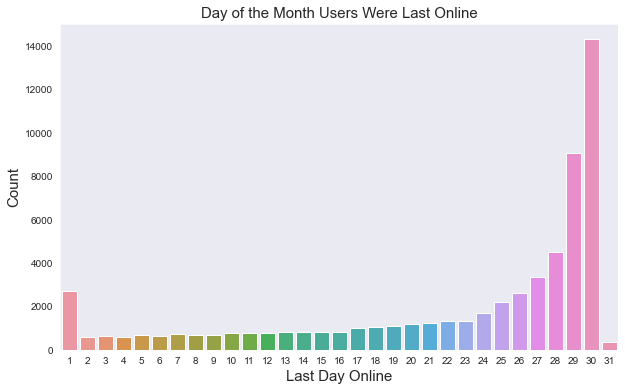

In [62]:
#Distribution of Day of the Month Users Were Last Online
plt.figure(figsize=(10,6))
sns.countplot( 
data= cupid,
x='last_online_day'
)
plt.xlabel('Last Day Online', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Day of the Month Users Were Last Online',fontsize=15)